<a href="https://colab.research.google.com/github/Aischy/MPA-MLF/blob/main/MPA_MLF_Lab1_Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import California Housing Dataset**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the California Housing Dataset
url = 'https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv'
dataset = pd.read_csv(url)

# Display first lines to check data loading
print(dataset.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


* **Check what dataset.describe() does**
> The pandas `describe()` function provides a statistical summary of the DataFrame's characteristics, such as mean, standard deviation, minimum and maximum values, as well as quantiles for each numerical column.






In [ ]:
dataset.describe()

* **display all rows where total_bedrooms column is bigger than 310**



In [ ]:
filtered_rows = dataset[dataset['total_bedrooms'] > 310]
print(filtered_rows)

* **drop also first and last row**

In [ ]:
print("Before drop : ")
print(dataset.head(1))
print(dataset.tail(1))

dataset = dataset.iloc[1:-1]

print("\n\n After drop : ")
print(dataset.head(1))
print(dataset.tail(1))

* **save a mean of values in households columns to variable, using matplotlib display number of households in the graph (x-axis would be ID, y-axis - numbers of households) as dots with the same color, display also mean as a single line in the graph with different color as dots is**

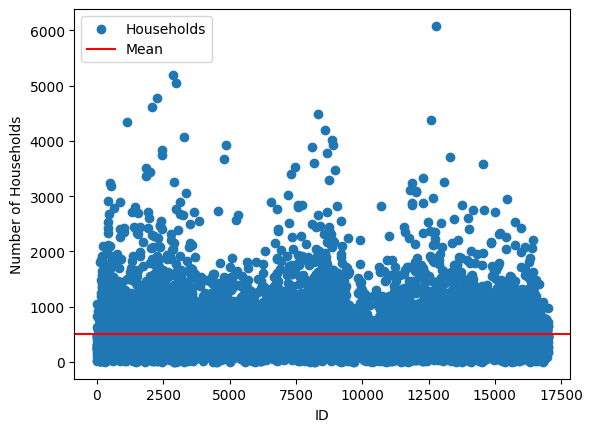

In [16]:
mean_households = dataset['households'].mean()
plt.scatter(dataset.index, dataset['households'], label='Households')
plt.axhline(y=mean_households, color='r', linestyle='-', label='Mean')
plt.xlabel('ID')
plt.ylabel('Number of Households')
plt.legend()
plt.show()

* **check if any of the columns contain NaN values, if yes, replace the NaN values with the arithmetic mean of the whole dataset**

In [17]:
dataset.fillna(dataset.mean(), inplace=True)

* **display lat and long into plot, lat would be on x axis and long on y axis**

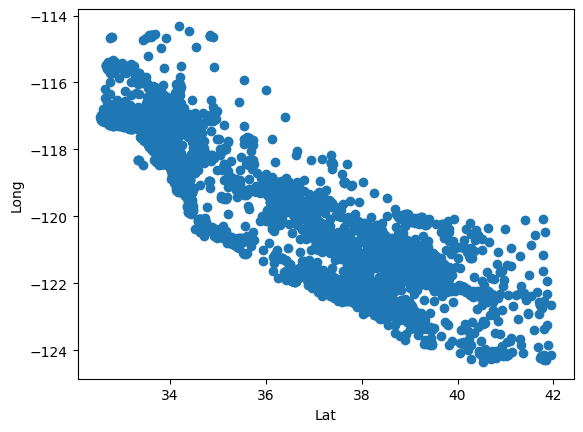

In [20]:
plt.scatter(dataset['latitude'], dataset['longitude'])
plt.xlabel('Lat')
plt.ylabel('Long')
plt.show()

* **choose two arbitrary columns and normalize all values inside using min-max normalization**

In [25]:
dataset['population_normalized'] = (dataset['population'] - dataset['population'].min()) / (dataset['population'].max() - dataset['population'].min())
dataset['total_bedrooms_normalized'] = (dataset['total_bedrooms'] - dataset['total_bedrooms'].min()) / (dataset['total_bedrooms'].max() - dataset['total_bedrooms'].min())

# Display new normalized columns for first rows
print(dataset[['population_normalized', 'total_bedrooms_normalized']].head())

   population_normalized  total_bedrooms_normalized
0               0.028364                   0.198945
1               0.031559                   0.294848
2               0.009249                   0.026847
3               0.014350                   0.052142
4               0.017405                   0.050435


* **Create a Correlation Matrix from all columns**

In [23]:
correlation_matrix = dataset.corr()
print(correlation_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925208           -0.114250     0.047010   
latitude            -0.925208  1.000000            0.016454    -0.038773   
housing_median_age  -0.114250  0.016454            1.000000    -0.360984   
total_rooms          0.047010 -0.038773           -0.360984     1.000000   
total_bedrooms       0.071802 -0.069373           -0.320434     0.928403   
population           0.101674 -0.111261           -0.295890     0.860170   
households           0.059628 -0.074902           -0.302754     0.919018   
median_income       -0.015485 -0.080303           -0.115932     0.195383   
median_house_value  -0.044982 -0.144917            0.106758     0.130991   

                    total_bedrooms  population  households  median_income  \
longitude                 0.071802    0.101674    0.059628      -0.015485   
latitude                 -0.069373   -0.111261   -0.074902      -0.080303   
housing_